In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Copy of interferometer day 1 - calibration curve.csv to Copy of interferometer day 1 - calibration curve.csv


In [ ]:
raw = pd.read_csv('/content/Copy of interferometer day 1 - calibration curve.csv')

In [ ]:
raw

,Micrometer Reading,Micrometer Uncertainty,Displacement (nm)
0,21.27,0.005,309382.5
1,21.14,0.005,294650.0
2,21.04,0.005,279917.5
3,20.93,0.005,265185.0
4,20.83,0.005,250452.5
5,20.73,0.005,235720.0
6,20.66,0.005,220987.5
7,20.57,0.005,206255.0
8,20.49,0.005,191522.5
9,20.39,0.005,176790.0


In [ ]:
x_micrometer_reading = raw['Micrometer Reading']
x_uncert = raw['Micrometer Uncertainty']
y_displacement = raw['Displacement (nm)']

0.9979980973469269
148945.07783523152 -2856279.039217197


TypeError: ignored

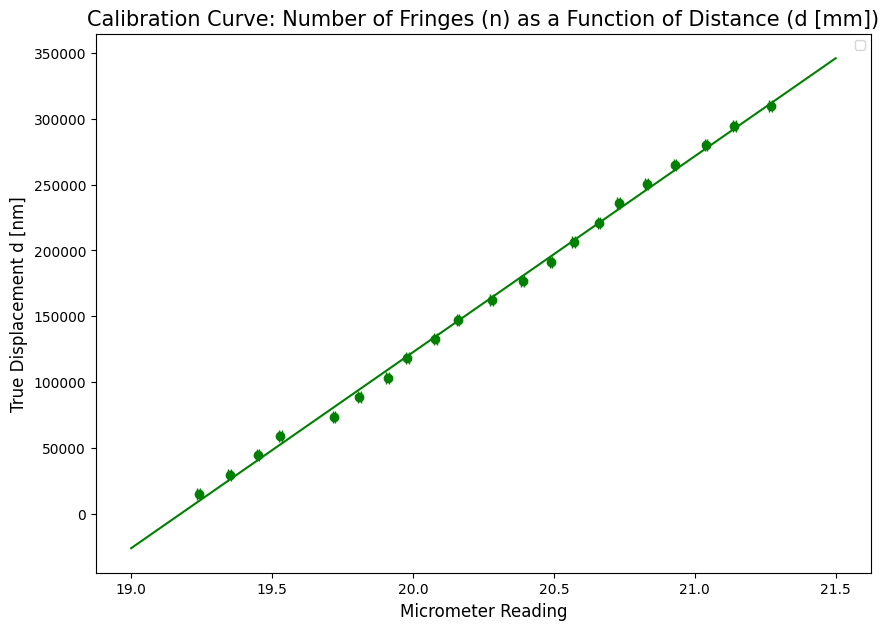

In [ ]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.scatter(x_micrometer_reading, y_displacement, c = 'g', marker = 'o', s = 1)
plt.errorbar(x_micrometer_reading, y_displacement, c = 'g', xerr = x_uncert, fmt='o', capsize = 4)
m1, b1 = np.polyfit(x_micrometer_reading, y_displacement, 1)


plt.plot(np.linspace(19,21.5,9), m1*np.linspace(19,21.5,9) + b1, color = 'g')
plt.title('Calibration Curve: Number of Fringes (n) as a Function of Distance (d [mm])', fontsize=15)
plt.legend(fontsize=9)

# Set axis limits and labels

plt.xlabel('Micrometer Reading', fontsize=12)
plt.ylabel('True Displacement d [nm]', fontsize=12)

# Show the plot

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_micrometer_reading, y_displacement)
print(r_value**2)
print(m1, b1)

str1 = 'Inner Radius Linear Fit y = ' + str(round(float(m1), 4)) + "x + " +str(round(float(b1), 4)) + '   R^2 = 0.999'
plt.title('Calibration Curve: True Displacement d [nm] vs Micrometer Reading with Associated Uncertainties and Linear Regression', fontsize = 15)
plt.legend(["Linear Regression", str1], fontsize = 9)
plt.show()


Power_divergenceResult(statistic=6470.160606740871, pvalue=0.0)
[-2400.266338177491, 2230.09378040256, 2392.101563925855, 4043.5601258012466, 4205.567909324542, 4367.575692847371, 61.23114131344482, -1266.2118535158224, -4083.1056266967207, -3921.0978431738913, -2269.6392812984996, 871.2700589294545, -1945.6237142519094, -1783.61593072908, -6089.960482263006, -5927.9526987392455, -7255.395693568513, 6311.669095125049, 3494.7753219436854, 3656.783105466515, 5308.241667342372]


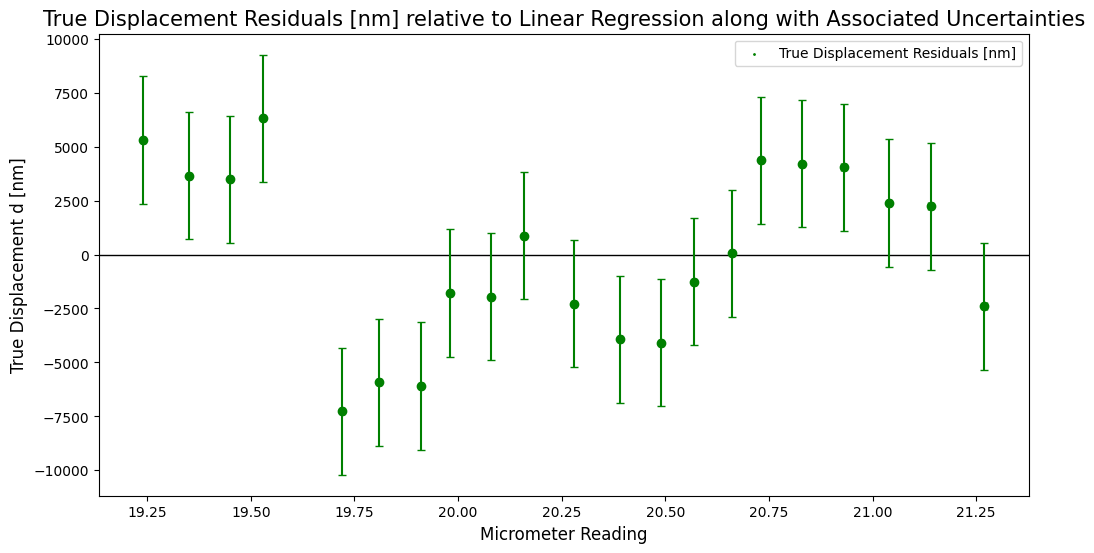

In [ ]:
# residuals:

residuals = []
expected = []
for i in range(len(x_micrometer_reading)):
  residuals.append( y_displacement[i] - (m1 * x_micrometer_reading[i] + b1) )
  expected.append(m1 * x_micrometer_reading[i] + b1 )

print(chisquare(y_displacement, expected))


print(residuals)

plt.rcParams["figure.figsize"] = [12, 6]


#Inner Radius
plt.scatter(x_micrometer_reading, residuals, c = 'g', marker = 'o', s = 1)
plt.axhline(y = 0, color = 'black', linewidth = 1)

plt.errorbar(x_micrometer_reading, residuals, c = 'g',xerr = x_uncert, yerr = (5*589.3), fmt='o', capsize = 3)
plt.title('True Displacement Residuals [nm] relative to Linear Regression along with Associated Uncertainties', fontsize = 15)
plt.xlabel('Micrometer Reading', fontsize=12)
plt.ylabel('True Displacement d [nm]', fontsize=12)

plt.legend(["True Displacement Residuals [nm]"])


0.9979980973469269
148945.07783523152 -2856279.039217197


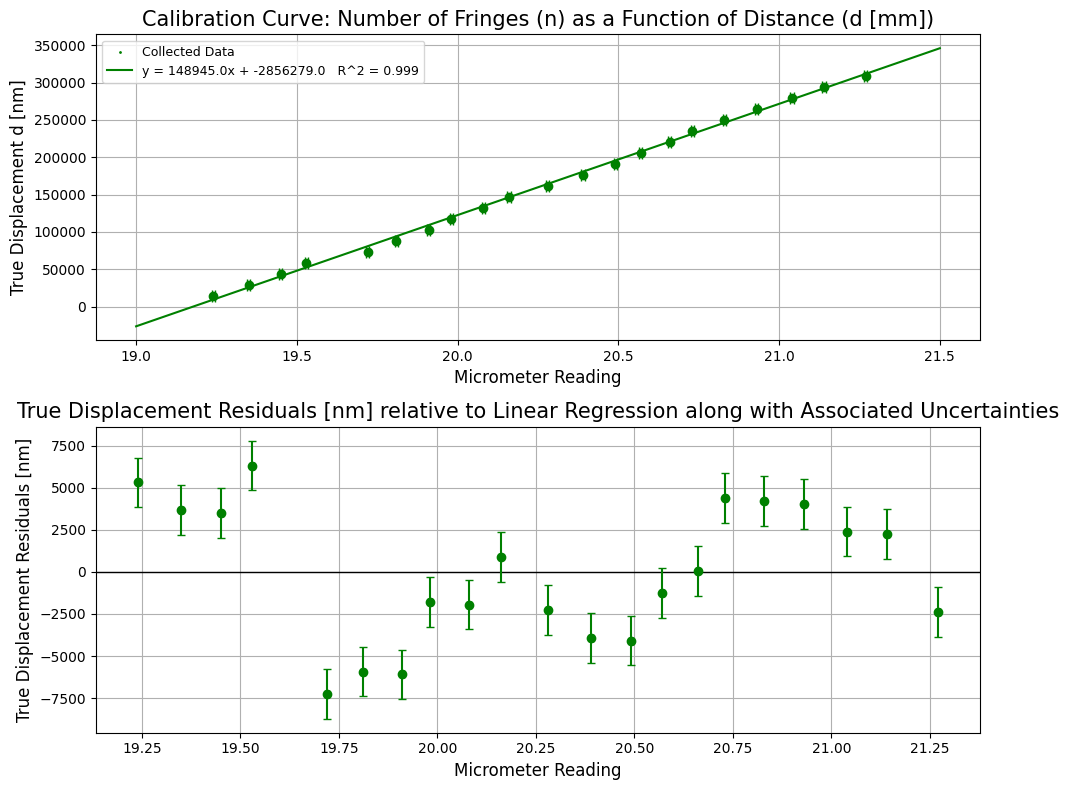

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
m1, b1 = np.polyfit(x_micrometer_reading, y_displacement, 1)
# Set axis limits and labels
# Show the plot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_micrometer_reading, y_displacement)
print(r_value**2)
print(m1, b1)

str1 = 'y = ' + str(round(float(m1), 0)) + "x + " +str(round(float(b1), 0)) + '   R^2 = 0.999'



# Plot 1: Linear Regression
ax1.scatter(x_micrometer_reading, y_displacement, c='g', marker='o', s=1)
ax1.errorbar(x_micrometer_reading, y_displacement, c='g', xerr=x_uncert, fmt='o', capsize=4)
ax1.plot(np.linspace(19, 21.5, 9), m1 * np.linspace(19, 21.5, 9) + b1, color='g')
ax1.set_title('Calibration Curve: Number of Fringes (n) as a Function of Distance (d [mm])', fontsize=15)
ax1.set_xlabel('Micrometer Reading', fontsize=12)
ax1.set_ylabel('True Displacement d [nm]', fontsize=12)
ax1.legend(["Collected Data", str1], fontsize = 9)
ax1.grid()




# Plot 2: Residuals
ax2.scatter(x_micrometer_reading, residuals, c='g', marker='o', s=1)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.errorbar(x_micrometer_reading, residuals, c='g', xerr=x_uncert, yerr=1473, fmt='o', capsize=3)
ax2.set_title('True Displacement Residuals [nm] relative to Linear Regression along with Associated Uncertainties', fontsize=15)
ax2.set_xlabel('Micrometer Reading', fontsize=12)
ax2.set_ylabel('True Displacement Residuals [nm]', fontsize=12)
ax2.grid()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
p, V = np.polyfit(x_micrometer_reading, y_displacement, 1, cov=True)

print("x_1: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("x_2: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

x_1: 148945.07783523152 +/- 1530.403591314851
x_2: -2856279.039217197 +/- 31026.78019077945


PROPORTIONAL RELATIONSHIP STARTS HERE (IGNORE ABOVE)

In [ ]:
## Pressure

0.9968065652736273
0.05514285714285713 0.047619047619048185
[-0.047619047619048185, -0.5619047619047617, 0.42380952380952586, 0.9095238095238116, -0.6047619047619008, -0.1190476190476133]


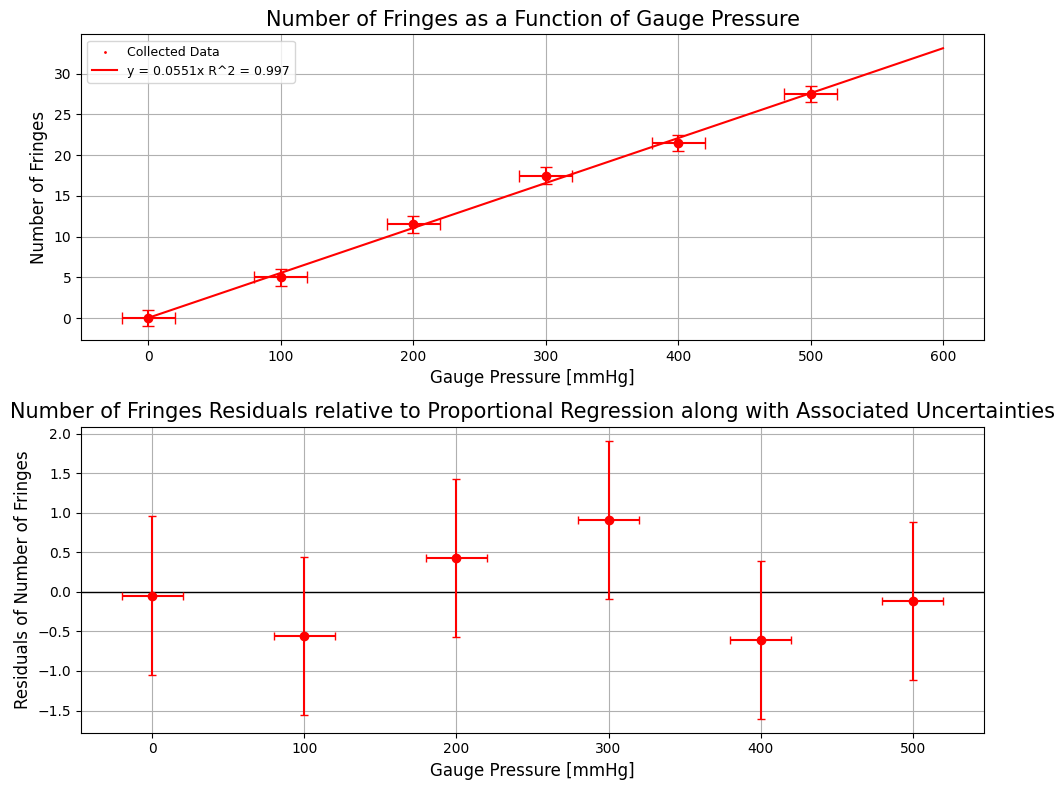

In [ ]:
x_pressure = [500, 400, 300, 200, 100, 0][::-1]
y_fringes = [0, 5, 11.5, 17.5, 21.5, 27.5]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
m1, b1 = np.polyfit(x_pressure, y_fringes, 1)
# Set axis limits and labels
# Show the plot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_pressure, y_fringes)
print(r_value**2)
print(m1, b1)

str1 = 'y = ' + str(round(float(m1), 4)) + "x R^2 = 0.997"


residuals = []
for i in range(len(x_pressure)):
  residuals.append( y_fringes[i] - (m1 * x_pressure[i] + b1) )

print(residuals)


# Plot 1: Linear Regression
ax1.scatter(x_pressure, y_fringes, c='r', marker='o', s=1)
ax1.errorbar(x_pressure, y_fringes, c='r', yerr = 1, xerr=20, fmt='o', capsize=4)
ax1.plot(np.linspace(0, 600, 9), m1 * np.linspace(0, 600, 9) + b1, color='r')
ax1.set_title('Number of Fringes as a Function of Gauge Pressure', fontsize=15)
ax1.set_xlabel('Gauge Pressure [mmHg]', fontsize=12)
ax1.set_ylabel('Number of Fringes', fontsize=12)
ax1.legend(["Collected Data", str1], fontsize = 9)

ax1.grid()
# Plot 2: Residuals



ax2.scatter(x_pressure, residuals, c='r', marker='o', s=1)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.errorbar(x_pressure, residuals, c='r', xerr=20, yerr=1, fmt='o', capsize=3)
ax2.set_title('Number of Fringes Residuals relative to Proportional Regression along with Associated Uncertainties', fontsize=15)
ax2.set_xlabel('Gauge Pressure [mmHg]', fontsize=12)
ax2.set_ylabel('Residuals of Number of Fringes', fontsize=12)
ax2.grid()
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
p, V = np.polyfit(x_pressure, y_fringes, 1, cov=True)

print("x_1: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("x_2: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

x_1: 0.05514285714285713 +/- 0.0015605685341118054
x_2: 0.047619047619048185 +/- 0.4724855874897011


In [ ]:
from scipy.stats import chisquare






ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
%pylab inline

# this sets the figure format to a vector format
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', quality=50)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
<ipython-input-58-a50da7824ded>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', quality=50)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with 21 points
x =x_micrometer_reading
y = y_displacement # Example linear relationship with noise

# Calculate the mean and std dev of each set of measurements.
y_mean = np.mean(y)
sigma_y = np.std(y, ddof=1) / np.sqrt(np.size(y))

# Calculate sums needed to obtain chi-square
s_yy = sum((y**2) / (sigma_y**2))
s_xx = sum((x**2) / (sigma_y**2))
s_xy = sum((y * x) / (sigma_y**2))

A_best = s_xy / s_xx
sigma_A = 1 / np.sqrt(s_xx)
minchi2 = s_yy - (s_xy**2) / s_xx

# Plot data with errorbars
plt.figure(facecolor='white')
plt.errorbar(x, y, sigma_y, linestyle='None', fmt='o', capsize=5, label='Data')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.plot(x, A_best * x, label='Best Fit Line')
plt.legend()

# Create parameter range for slope
xmin = A_best - 2 * sigma_A
xmax = A_best + 2 * sigma_A
A_range = np.linspace(xmin, xmax, 200)

# Calculate chi-square
chi2 = s_yy + (A_range**2) * s_xx - 2 * A_range * s_xy

# Display chi-square vs. slope
plt.figure(facecolor='white')
plt.plot(A_range, chi2)
plt.xlabel('slope', fontsize=16)
plt.ylabel('chisq', fontsize=16)
plt.grid(True)
plt.title("Chisquared vs Slope and minchi2 + 1 \n %4d points   chisq min =%6.2f    best slope =%7.2f " % (x.size, minchi2, A_best))
plt.hlines(minchi2 + 1, xmin, xmax)

print(" %4d points   chisq min =%6.2f    best slope =%7.2f +/- %.2f " % (x.size, minchi2, A_best, sigma_A))

plt.show()


   21 points   chisq min =375.87    best slope =8119.78 +/- 214.71 


TypeError: ignored

<Figure size 1200x600 with 1 Axes>

TypeError: ignored

<Figure size 1200x600 with 1 Axes>